 Classification:
 Linear regression works well when the target column we're trying to predict, the dependent variable, is ordered and continuous. If the target column instead contains discrete values, then linear regression isn't a good fit.
 In classification, our target column has a finite set of possible values which represent different categories a row can belong to. We use integers to represent the different categories so we can continue to use mathematical functions to describe how the independent variables map to the dependent variable. Here are a few examples of classification problems:
 In binary classification , where the only 2 options for values are:

    0 for the False condition,
    1 for the True condition.


Data- Predicting whether student is admitted or not depending on gpa score

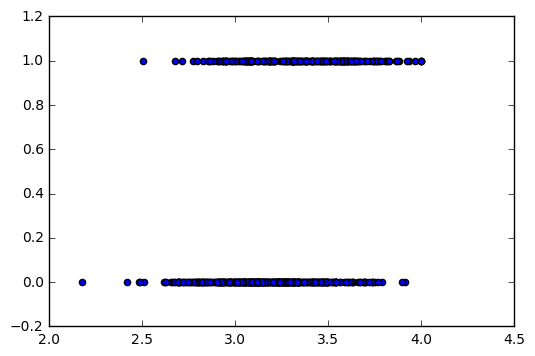

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
admissions = pd.read_csv("admissions.csv")
plt.scatter(admissions['gpa'], admissions['admit'])
plt.show()

gpa column and the admit column do not have a clear linear relationship. Recall that the admit column only contains the values 0 and 1 and are used to represent binary values and the numbers themselves don't carry any weight. When numbers are used to represent different options or categories, they are referred to as categorical values. Classification focuses on estimating the relationship between the independent variables and the dependent, categorical variable.

In [ ]:
Training logistic regression

In [2]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(admissions[["gpa"]], admissions["admit"])
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Plotting probabilities

probabilities = logistic_model.predict_proba(admissions[["gpa"]])
Probability that the row belongs to label `0`.
probabilities[:,0]
Probabililty that the row belongs to label `1`.
probabilities[:,1]

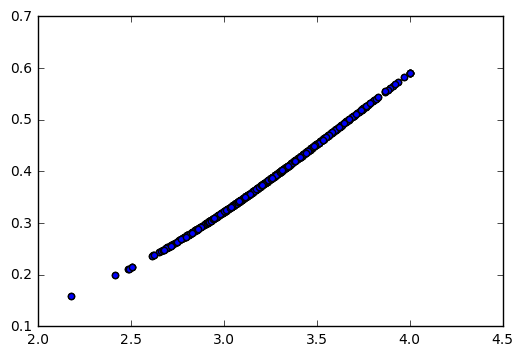

In [4]:
pred_probs=logistic_model.predict_proba(admissions[["gpa"]])
import matplotlib.pyplot as plt
plt.scatter(admissions["gpa"],pred_probs[:,1])
plt.show()

Predict labels

You'll notice that the scatter plot suggests a linear relationship between the gpa values and the probability of being admitted. This if because logistic regression is really just an adapted version of linear regression for classification problems. Both logistic and linear regression are used to capture linear relationships between the independent variables and the dependent variable.

In [7]:
labels=logistic_model.predict(admissions[["gpa"]])
admissions["predicted_label"]=labels   #creating a new column for the predicted values
admissions["predicted_label"].value_counts
print(admissions.head(5))

   admit       gpa         gre  predicted_label
0      0  3.177277  594.102992                0
1      0  3.412655  631.528607                0
2      0  2.728097  553.714399                0
3      0  3.093559  551.089985                0
4      0  3.141923  537.184894                0


Accuracy

The admissions Dataframe now contains the predicted value for that row, in the predicted_label column, and the actual value for that row, in the admit column. This format makes it easier for us to calculate how effective the model was on the training data. The simplest way to determine the effectiveness of a classification model is prediction accuracy. Accuracy helps us answer the question:

    What fraction of the predictions were correct (actual label matched predicted label)?

Prediction accuracy boils down to the number of labels that were correctly predicted divided by the total number of observations:

In logistic regression, recall that the model's output is a probability between 0 and 1. To decide who gets admitted, we set a threshold and accept all of the students where their computed probability exceeds that threshold. This threshold is called the discrimination threshold and scikit-learn sets it to 0.5 by default when predicting labels. If the predicted probability is greater than 0.5, the label for that observation is 1. If it is instead less than 0.5, the label for that observation is 0.

An accuracy of 1.0 means that the model predicted 100% of admissions correctly for the given discrimination threshold. An accuracy of 0.2 means that the model predicted 20% of the admissions correctly. Let's calculate the accuracy for the predictions the logistic regression model made.

In [10]:
admissions["actual_label"]=admissions["admit"]
matches= admissions["actual_label"] == admissions["predicted_label"]
correct_predictions=admissions[matches]
print(correct_predictions.head(5))
accuracy=float(len(correct_predictions))/float(len(admissions))
print(accuracy)

   admit       gpa         gre  predicted_label  actual_label
0      0  3.177277  594.102992                0             0
1      0  3.412655  631.528607                0             0
2      0  2.728097  553.714399                0             0
3      0  3.093559  551.089985                0             0
4      0  3.141923  537.184894                0             0
0.645962732919


3: Binary classification outcomes

It looks like the raw accuracy is around 64.6% which is better than randomly guessing the label (which would result in around a 50% accuracy). Calculating the accuracy of a model on the dataset used for training is a useful initial step just to make sure the model at least beats randomly assigning a label for each observation. However, prediction accuracy doesn't tell us much more.

The accuracy doesn't tell us how the model performs on data it wasn't trained on. A model that returns a 100% accuracy when evaluated on it's training set doesn't tell us how well the model works on data it's never seen before (and wasn't trained on). Accuracy also doesn't help us discriminate between the different types of outcomes a binary classification model can make. In a later mission, we'll learn how to evaluate a model's effectiveness on new, unseen data. In this mission, we'll focus on the principles of evaluating binary classification models by testing our model's effectiveness on the training data.

To start, let's discuss the 4 different outcomes of a binary classification model:

Prediction 	
Observation
	            Admitted (1) 	        Rejected (0)
Admitted (1) 	True Positive (TP) 	    False Positive (FP)
Rejected (0) 	False Negative (FN) 	True Negative (TN)

By segmenting a model's predictions into these different outcome categories, we can start to think about other measures of effectiveness that give us more granularity than simple accuracy.

We can define these outcomes as:

    True Positive - The model correctly predicted that the student would be admitted.
        Said another way, the model predicted that the label would be Positive, and that ended up being True.
        In our case, Positive refers to being admitted and maps to the label 1 in the dataset.
        For this dataset, a true positive is whenever predicted_label is 1 and actual_label is 1.

    True Negative - The model correctly predicted that the student would be rejected.
        Said another way, the model predicted that the label would be Negative, and that ended up being True.
        In our case, Negative refers to being rejected and maps to the label 0 in the dataset.
        For this dataset, a true negative is whenever predicted_label is 0 and actual_label is 0.

    False Positive - The model incorrectly predicted that the student would be admitted even though the student was actually rejected.
        Said another way, the model predicted that the label would be Positive, but that was False (the actual label was True).
        For this dataset, a false positive is whenever predicted_label is 1 but the actual_label is 0.

    False Negative - The model incorrectly predicted that the student would be rejected even though the student was actually admitted.
        Said another way, the model predicted that the would be Negative, but that was False (the actual value was True).
        For this dataset, a false negative is whenever predicted_label is 0 but the actual_label is 1.

Let's calculate the number of observations that fall into some of these outcome categories.

In [20]:
predicted_label_1=admissions["predicted_label"]==1
predicted_label_0=admissions["predicted_label"]==0
actual_label_0=admissions["actual_label"]==0
actual_label_1=admissions["actual_label"]==1

true_positives_filter=predicted_label_1 & actual_label_1
true_negatives_filter=predicted_label_0 & actual_label_0
false_negatives_filter=predicted_label_1 & actual_label_0
false_positives_filter=predicted_label_1 & actual_label_1

true_positives=len(admissions[true_positives_filter])
true_negatives=len(admissions[true_negatives_filter])
false_negatives=len(admissions[false_negatives_filter])
false_positives=len(admissions[false_positives_filter])

sensitivity=float(true_positives)/float(true_positives+false_negatives)
print(sensitivity)

specificity=float(true_negatives)/float(true_negatives+false_positives)
print(specificity)

0.673913043478
0.925480769231
